9. Закрепление знаний

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px



In [3]:
churn_data = pd.read_csv('D:\IDE\PY_13_Визуализация\Data\Pandas_visualization\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.drop('RowNumber', axis=1, inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [5]:
exited_ratio = pd.Series([churn_data['Exited'].sum(), (churn_data.shape[0]-churn_data['Exited'].sum())], index=['Exited', "Loyal"])
display(exited_ratio)

Exited    2037
Loyal     7963
dtype: int64

In [9]:
plt.style.use('default')

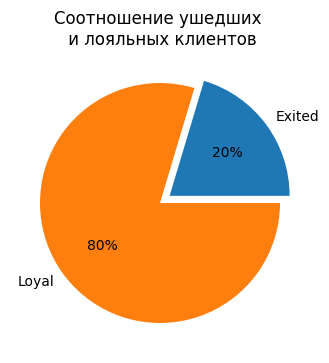

In [10]:
fig = plt.figure(figsize=(3,3))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    exited_ratio,
    labels = exited_ratio.index,
    autopct = '%.f%%',
    explode=[0.1,0]
)
axes.set_title('Соотношение ушедших \n и лояльных клиентов', fontsize=12);

ОТВЕТ 9.1:
Всего ушло 20% от общего числа клиентов банка

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [11]:
balance_data = churn_data[churn_data['Balance'] > 2500].sort_values(by='Balance', ).reset_index(drop=True) 
balance_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15806771,Yefremova,753,France,Female,40,0,3768.69,2,1,0,177065.24,1
1,15713774,Chikwendu,644,Spain,Female,46,6,12459.19,1,0,0,156787.34,1
2,15776467,De Salis,702,Spain,Female,35,8,14262.80,2,1,0,54689.16,0
3,15741416,Yegorov,707,France,Male,42,2,16893.59,1,1,1,77502.56,0
4,15669011,Bocharova,659,France,Female,44,9,23503.31,1,0,1,169862.01,1


In [12]:
balance_data['Loyalty'] = balance_data['Exited'].apply(lambda x: 'Loyal' if x==0 else 'Exited')


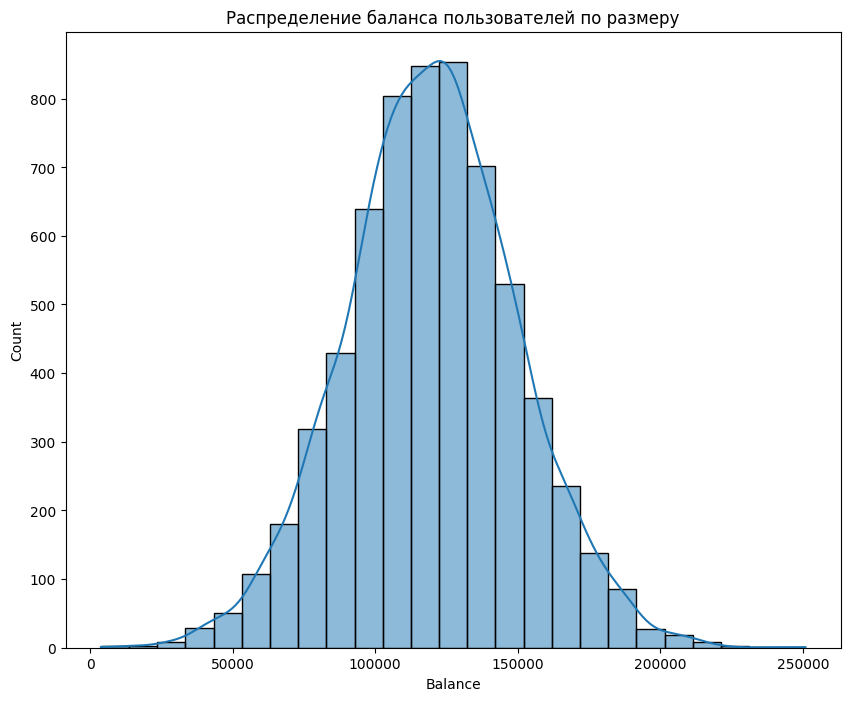

In [13]:
fig = plt.figure(figsize=(10,8))
hist_data = sns.histplot(
    data=balance_data,
   
    x='Balance',
    bins=25,
    kde=True
)
hist_data.set_title('Распределение баланса пользователей по размеру');

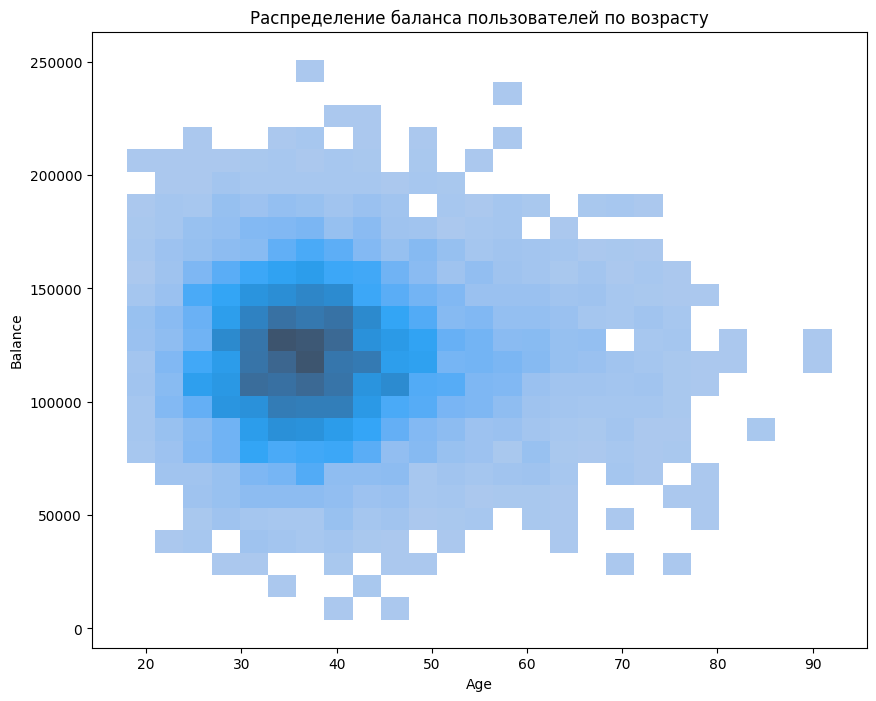

In [14]:
fig = plt.figure(figsize=(10,8))
hist_date = sns.histplot(
    data=balance_data,
    y='Balance',
    x='Age',
    bins=25,
    kde=True,
    
)
hist_date.set_title('Распределение баланса пользователей по возрасту');

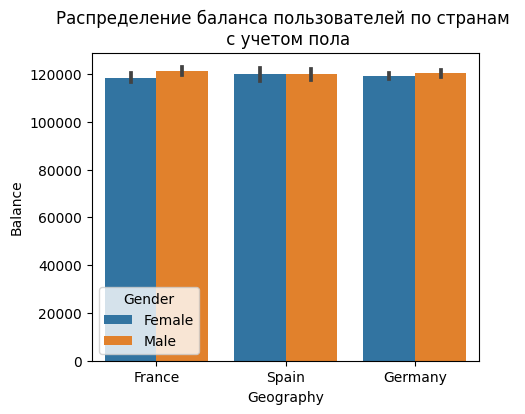

In [15]:
fig = plt.figure(figsize=(5,4))
bar_date = sns.barplot(
    data=balance_data,
    y='Balance',
    x='Geography',
    hue='Gender'   
)
bar_date.set_title('Распределение баланса пользователей по странам \n с учетом пола');

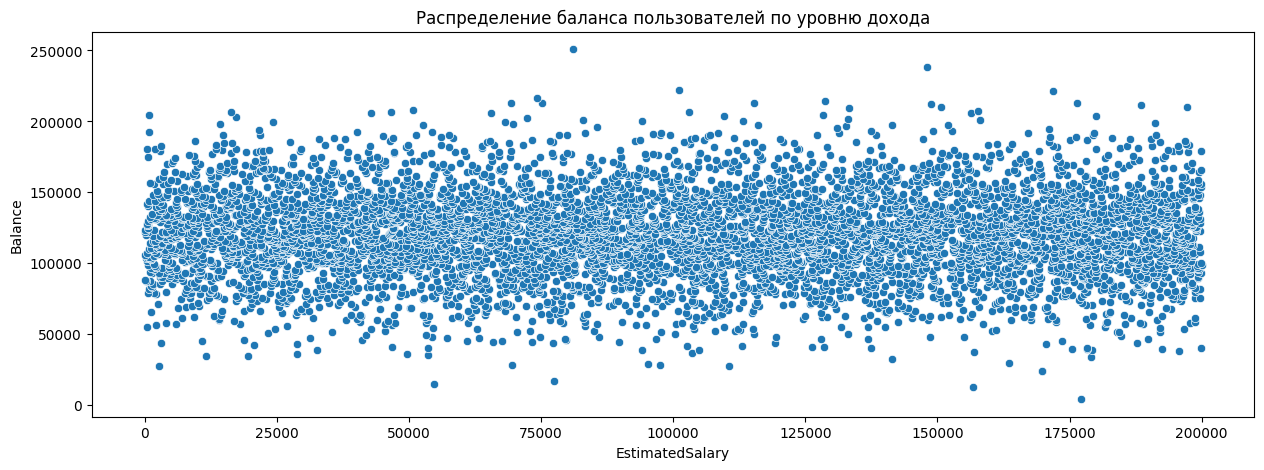

In [16]:
fig = plt.figure(figsize=(15,5))
scatter_data = sns.scatterplot(
    data=balance_data,
    y='Balance',
    x='EstimatedSalary',
    
)
scatter_data.set_title('Распределение баланса пользователей по уровню дохода');

ОТВЕТ 9.2:
1. Распределение баланса практически не зависит от пола или страны
2. Распределение баланса не зависит от уровня дохода
3. Средний баланс пользователей находится в диапазоне от 100 000 до 150 000
4. Распределение по возрасту указывает. что ниабольшие размеры баланса относятся к возрастной категории от 30 до 42 лет

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

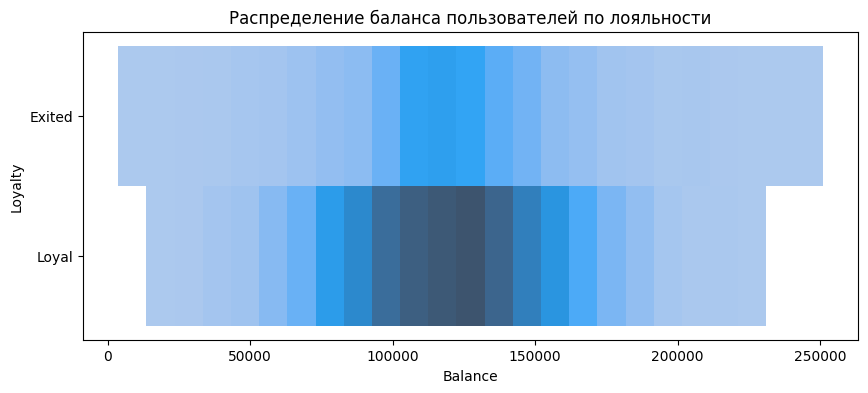

In [17]:
fig = plt.figure(figsize=(10,4))
hist_data_2 = sns.histplot(
    data=balance_data,
    y='Loyalty',
    x='Balance',
    bins=25,    
)
hist_data_2.set_title('Распределение баланса пользователей по лояльности');

In [18]:

hist_data_px = px.histogram(
    data_frame=balance_data,
    height=500,
    width=1000,
    x='Balance',
    color='Loyalty',   
    nbins=50,
    title = ('Распределение баланса пользователей по лояльности'), 
)
hist_data_px.show()

In [25]:
balance_data.groupby('Balance', as_index=False)['Loyalty'].sum()

,Balance,Loyalty
0,3768.69,Exited
1,12459.19,Exited
2,14262.80,Loyal
3,16893.59,Loyal
4,23503.31,Exited
...,...,...
6376,216109.88,Exited
6377,221532.80,Loyal
6378,222267.63,Exited
6379,238387.56,Exited


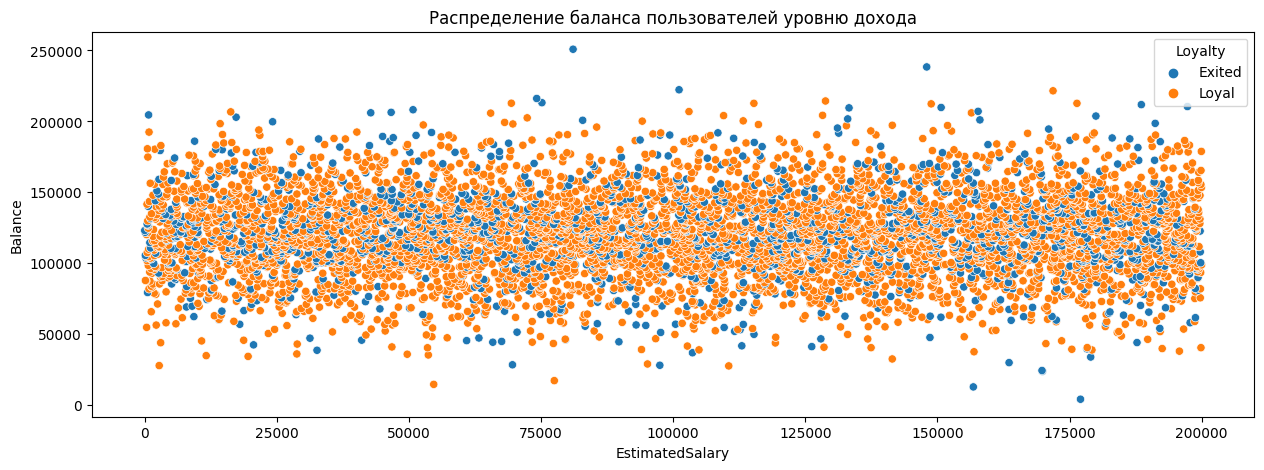

In [19]:
fig = plt.figure(figsize=(15,5))
scatter_data = sns.scatterplot(
    data=balance_data,
    y='Balance',
    x='EstimatedSalary',
    hue='Loyalty'
)
scatter_data.set_title('Распределение баланса пользователей уровню дохода');

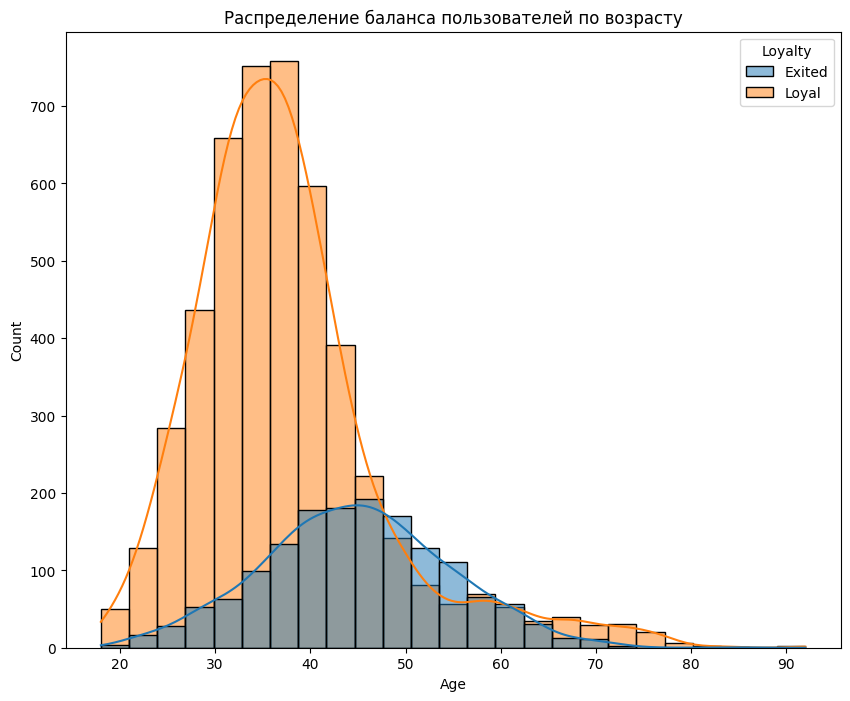

In [20]:
fig = plt.figure(figsize=(10,8))
hist_date = sns.histplot(
    data=balance_data,
    x='Age',
    bins=25,
    kde=True,
    hue='Loyalty'  
)
hist_date.set_title('Распределение баланса пользователей по возрасту');

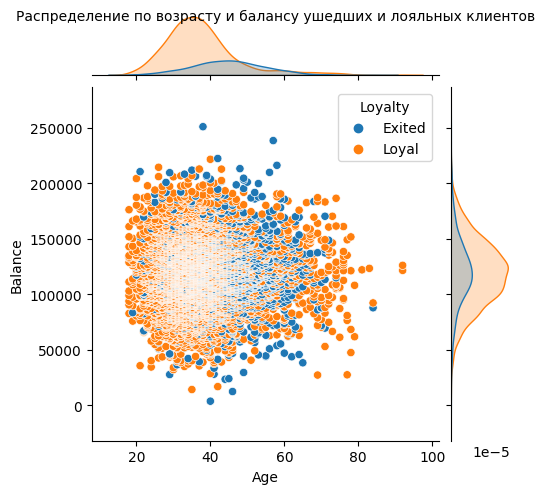

In [21]:
jointplot = sns.jointplot(
    data=balance_data,
    y='Balance',
    x='Age',
    hue='Loyalty',
    height = 5,
)

plt.suptitle('Распределение по возрасту и балансу ушедших и лояльных клиентов', fontsize=10);

ОТВЕТ 9.3:
Суммарный баланс лояльный клиентов примерно в 3 раза больше суммарного баланса ушедших клиенов.
Прослеживается зависимость ушедших клиентов по признаку возраста. Большая их часть находится в промежутке от 35 до 55. Вероятно, продукты или условия, предлагаемые банком, не учитывают потребности более возратной категории

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

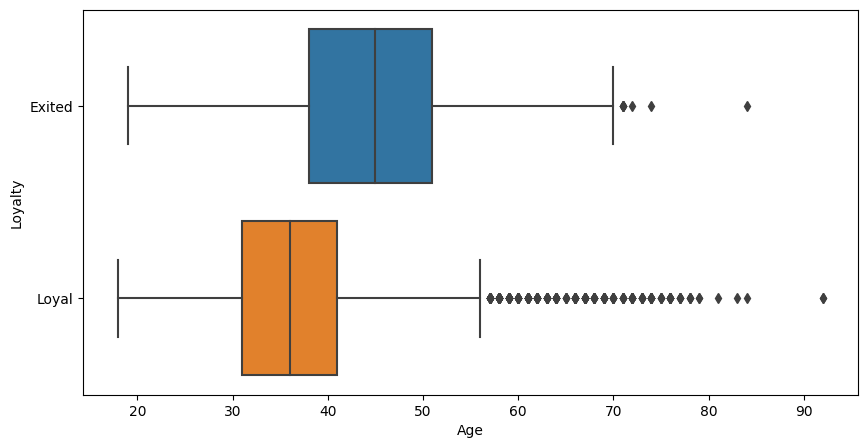

In [22]:
fig = plt.figure(figsize=(10,5))
boxplot_age = sns.boxplot(
    data=balance_data,
    y='Loyalty',
    x='Age',
    orient='h',
    width=0.8
)

ОТВЕТ 9.4:
Большая часть ушедших клиентов находится в более старшей возрастной группе, чем лояльные.
Среди лояльных больше потенциальных выбросов по возрасту от 55 лет и выше.
Банку стоит обратить внимание на возрастную группу 40-50 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

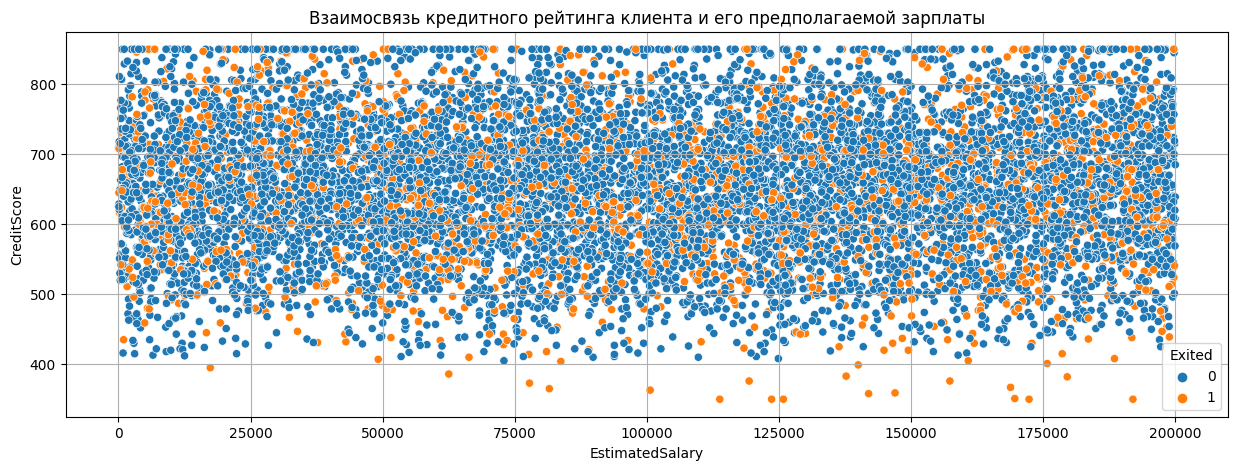

In [23]:
fig = plt.figure(figsize=(15,5))
scatter_data = sns.scatterplot(
    data=churn_data,
    y='CreditScore',
    x='EstimatedSalary',
    hue='Exited',  
)
scatter_data.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты');
scatter_data.grid()

ОТВЕТ 9.5:
Судя по графику, отсутствует взяимосвязь между кредитным рейтингом и предполагаемой зарплатой клиента. Однако стоит отметить, что в зоне кредитного рейтинга ниже 400 пунктов присутствуют только ушедшие клиенты.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [28]:
gender_data_2 = pd.DataFrame()
gender_data_2 = (churn_data[churn_data['Exited'] == 1].groupby(by='Gender', as_index=False)['Exited'].count())
gender_data_2['Total'] = (churn_data.groupby(by='Gender', as_index=False).count()['Exited'])
gender_data_2['Ratio'] = round((gender_data_2['Exited'] / gender_data_2['Total'] * 100), 2)
display(gender_data_2)

,Gender,Exited,Total,Ratio
0,Female,1139,4543,25.07
1,Male,898,5457,16.46


In [29]:
bar_gender = px.bar(
    data_frame=gender_data_2,
    x='Ratio',
    y='Gender',
    title=('Сравнение ушедших клиентов по полу'),
    color='Gender',
    text_auto=True,
    height = 300,
    width= 500    
)

bar_gender.update_layout(
                  xaxis_title="Процент ушедших клиентов",
                  yaxis_title="Пол",
                  margin=dict(l=1, r=1, t=30, b=1))

bar_gender.show()

ОТВЕТ 9.6:
Чаще уходят женщины

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [30]:
num_of_products = pd.DataFrame()
num_of_products = churn_data.groupby(by='NumOfProducts', as_index=False)['Exited'].sum()
num_of_products['Total'] = churn_data.groupby(by='NumOfProducts', as_index=False)['NumOfProducts'].count()
num_of_products['Remain'] = num_of_products['Total'] - num_of_products['Exited']
display(num_of_products)

,NumOfProducts,Exited,Total,Remain
0,1,1409,5084,3675
1,2,348,4590,4242
2,3,220,266,46
3,4,60,60,0


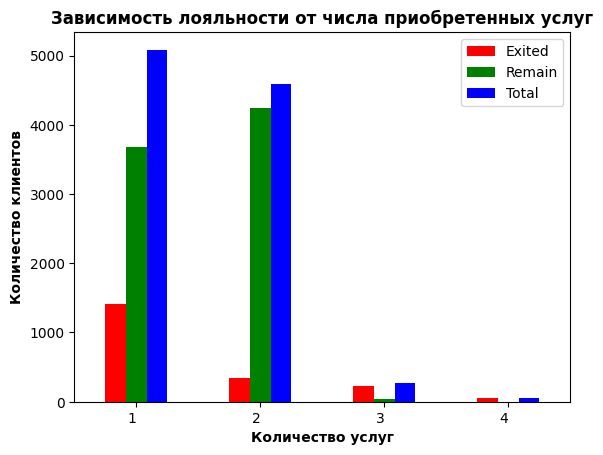

In [31]:
num_of_products.plot.bar(x='NumOfProducts',y=["Exited","Remain", "Total"],color=["red", "green", "blue"])
plt.title('Зависимость лояльности от числа приобретенных услуг',fontsize=12,fontweight='bold')
plt.xlabel('Количество услуг',fontweight='bold')
plt.ylabel('Количество клиентов',fontweight='bold')
ax = plt.gca()
ax.set_xticklabels(num_of_products['NumOfProducts'],rotation=0,ha='right');

ОТВЕТ 9.7:
Практически все клиенты, которые приобретали более 3 услуг ушли. Больше всего осталось клиентов среди группы, приобретавшей 2 вида услуг.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [32]:
active_clients = pd.DataFrame()
active_clients = churn_data.groupby(by='IsActiveMember', as_index=False)['Exited'].sum()
active_clients['Total'] = churn_data.groupby(by='IsActiveMember', as_index=False)['IsActiveMember'].count()
active_clients['Remain'] = active_clients['Total'] - active_clients['Exited']
active_clients['Activity'] = active_clients['IsActiveMember'].apply(lambda x: 'Active' if x == 1 else "Not active")
display(active_clients)

,IsActiveMember,Exited,Total,Remain,Activity
0,0,1302,4849,3547,Not active
1,1,735,5151,4416,Active


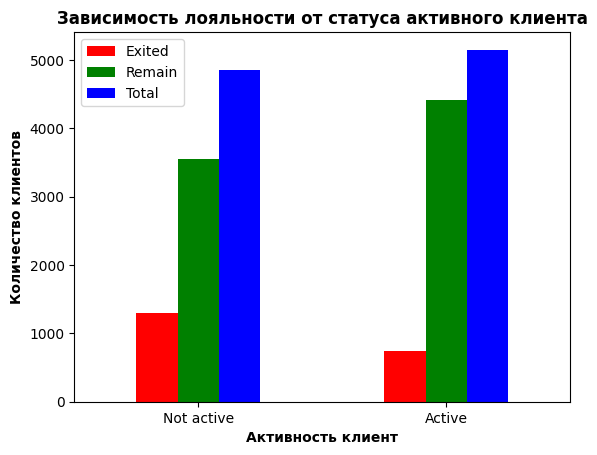

In [33]:
active_clients.plot.bar(x='Activity',y=["Exited","Remain", "Total"],color=["red", "green", "blue"])
plt.title('Зависимость лояльности от статуса активного клиента',fontsize=12,fontweight='bold')
plt.xlabel('Активность клиент',fontweight='bold')
plt.ylabel('Количество клиентов',fontweight='bold')
ax = plt.gca()
ax.set_xticklabels(active_clients['Activity'],rotation=0);

ОТВЕТ 9.8:
Отток среди неактивных клиентов выше примерно в 2 раза.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [34]:
country_data = churn_data.groupby(by='Geography', as_index=False)['Exited'].sum()
country_data = pd.merge(country_data, (churn_data.groupby(by='Geography', as_index=False)['Exited'].count()), on='Geography')
country_data.columns=['Geography', 'Exited', 'Total']
country_data['Ratio'] = round(country_data['Exited'] / country_data['Total'] * 100, 1)
display(country_data)

,Geography,Exited,Total,Ratio
0,France,810,5014,16.2
1,Germany,814,2509,32.4
2,Spain,413,2477,16.7


In [35]:
fig = px.choropleth(
    data_frame=country_data,
    locations='Geography',
    locationmode='country names',
    color='Ratio',
    range_color=[0, 100],
    title='Доля ушедших клиентов по отношению к общему числу в стране',
    color_continuous_scale='Reds'
)

fig.show()

ОТВЕТ 9.9:
Доля ушедших клиентов больше в Германии. Это может быть связано с особеностями рынка, например, больший уровень конкуренции, неадаптированное под спрос и нужды клиентов предложение.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [36]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [37]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [38]:
pivot_data = pd.pivot_table(
    churn_data,
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
        
) * 100

display(pivot_data)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,27.500000,20.833333,13.725490,16.831683,13.186813,23.333333,24.137931,12.765957,19.607843,27.083333,25.490196
Fair,21.739130,21.559633,21.304348,21.645022,19.724771,20.689655,23.636364,17.110266,20.901639,19.004525,20.535714
Good,20.382166,20.360825,18.734177,20.596206,19.512195,21.447028,18.285714,19.189189,15.235457,19.466667,19.780220
Poor,22.641509,25.939850,21.176471,21.224490,23.320158,19.915254,17.991632,15.126050,21.457490,25.108225,16.949153
Very_Poor,44.444444,25.373134,15.151515,28.571429,29.310345,14.925373,22.535211,20.634921,25.352113,22.950820,33.333333


In [39]:
fig = px.imshow(    
    pivot_data,
    labels=dict(x='Tenure', y='CreditScoreCat'),
    title='Тепловая карта зависимосит оттока клиентов от длительности использования услуг и кредитного рейтинга',  
)

fig.show()

ОТВЕТ 9.10:
Большая часть ушедших среди клиентов с очень низким рейтингом. Максимальное количество уходит до 1 года.